In [1]:

import sys

#Quick fudge to make import from ../Scripts work
sys.path.append('../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
dictMarkerShape = {BPSnameslist[i]: markershapes[i] for i in range(len(BPSnameslist))}

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])
colors = ['#1f77b4', '#ff7f0e']
colors_lighter = [adjust_lightness(color=colors[0], amount=2.2),adjust_lightness(color=colors[1], amount=1.7)]




obtain index of the SFRD models that we want to highlight


In [3]:

def plotMRR_nonMRR_GW_events(axe=None, whichRate='intrinsic', ylims=[0,1], spin_threshold=0.05, GWnames=['GW150912'], GWlabels='GW150912'):



    channelColorDict = {'LVKM1 spinning':'mediumseagreen', 'LVKM2 spinning':'crimson', 'All one spinning':'darkgray'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    
    
    
    for ind_GW, GWname in enumerate(GWnames):
        print(GWname)
        stringgg =   'MRR_nonMRR_ratio_' + GWname 
        csvPath = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_'+'BHBH'+ '_' + stringgg + '.csv'
#         print('now at ', GWname)



        df = pd.read_csv(csvPath, index_col=0).T

    #     for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

        for ind_L, MSSFRname in enumerate(MSSFRnameslist[0:]):
            key_mssfr = MSSFRheaderDict[MSSFRname]
            rates_L = df[key_mssfr]

            if whichRate =='intrinsic':
                xlabel =  r'model ' 
                text_legend = r'\textbf{a) intrinsic population}'

                totalrates = np.asarray(rates_L[0::10][0:nModels])

                fraction_MRR = np.asarray(rates_L[2::10][0:nModels]) #
                fraction_nonMRR = (np.asarray(rates_L[4::10][0:nModels])) # / fraction_spin
                fraction_MRR_CIspin = (np.asarray(rates_L[6::10][0:nModels])) #/ fraction_spin
                fraction_nonMRR_CIspin = (np.asarray(rates_L[8::10][0:nModels])) #/ fraction_spin

            elif whichRate=='observed':
                xlabel =  r'model ' 
                text_legend = r'\textbf{b) detectable population}' 

                totalrates = np.asarray(rates_L[1::10][0:nModels])
                fraction_MRR = np.asarray(rates_L[3::10][0:nModels]) #
                fraction_nonMRR = (np.asarray(rates_L[5::10][0:nModels])) # / fraction_spin
                fraction_MRR_CIspin = (np.asarray(rates_L[7::10][0:nModels])) #/ fraction_spin
                fraction_nonMRR_CIspin = (np.asarray(rates_L[9::10][0:nModels])) #/ fraction_spin   


            for ind_BPS, BPS_name in enumerate(BPSnameslist[0:]):
#             for ind_BPS, BPS_name in enumerate([BPSnameslist[0], 'H', 'I', 'J', 'K', 'P']):

                color_BPS = 'gray'
                zorder=3
#                 color_BPS = [colorDirDict[BPS_name]]
                zorder=10
                
                
                if ((MSSFRname in ['123']) & (BPS_name in ['K'])):
                    ls_ = ':'
                    Highlight = True
                    color_BPS = [colorDirDict[BPS_name]]
                    zorder=100
                elif  ((MSSFRname in ['312']) & (BPS_name in ['T'])):
                    ls_ = '--'
                    Highlight = True
                    color_BPS = [colorDirDict[BPS_name]]
                    zorder=100
                elif ((MSSFRname in ['231']) & (BPS_name in ['O'])):
                    ls_ = '-.'
                    Highlight = True
                    color_BPS = [colorDirDict[BPS_name]]
                    zorder=100
#                 if GWname=='GW190412':
#                     print('fraction MRR and non MRR for model %s %s is '%(BPS_name,MSSFRname), fraction_MRR[ind_BPS], fraction_nonMRR[ind_BPS], ' ratio =',  fraction_MRR[ind_BPS]/(fraction_MRR[ind_BPS]+fraction_nonMRR[ind_BPS]) )
                    
                    
                if (fraction_MRR[ind_BPS]>1E-3) & (fraction_nonMRR[ind_BPS]>1E-3): 
                    axe.scatter(ind_GW, fraction_MRR[ind_BPS]/(fraction_MRR[ind_BPS]+fraction_nonMRR[ind_BPS]),  c=color_BPS,\
                                s=100, label=None, zorder=zorder, alpha=1, marker=markershapes[ind_BPS]) #c=BPScolors


   
                    
    
    xmin, xmax = -0.05,1.05
    axe.set_xlim(ylims[0], ylims[1])
    axe.set_ylim(xmin, xmax)
#     axe.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    axe.set_yticks([0,0.5, 1])
    
    axe.fill_between(x=[ylims[0], 350], y1=[0,0], y2=[0.5, 0.5], color=colors_lighter[0], zorder=1)
    axe.fill_between(x=[ylims[0], 350], y1=[0.5,0.5], y2=[1, 1], color=colors_lighter[1], zorder=1)
    
#     axe.set_yticklabels([r'$0\%$',r'$20\%$',r'$40\%$', r'$60\%$', r'$80\%$', r'$100\%$'], fontsize=20, rotation=0)#, orientation=30)  
    
    ylabel = r'$\textbf{Fraction MRR} $'
    axe == layoutAxesNoXlabel(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=fs_GW)
    
    
    
    axe.set_xticks(range(len(GWnames)))
    axe.set_xticklabels(GWlabels, fontsize=18, rotation=90)#, orientation=30)  
        
    axe.set_xlim(ylims[0], ylims[1]) 
    
    axe.grid(True)

    

    


    return axe



    
    
    
    

In [4]:
A =1

79
GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170818
GW170823
GW190408_181802
GW190412
GW190413_052954
GW190413_134308
GW190421_213856
GW190424_180648
GW190503_185404
GW190512_180714
GW190513_205428
GW190514_065416
GW190517_055101
GW190519_153544
GW190521
GW190521_074359
GW190527_092055
GW190602_175927
GW190620_030421
GW190630_185205
GW190701_203306
GW190706_222641
GW190707_093326
GW190708_232457
GW190719_215514
GW190720_000836
GW190727_060333
GW190728_064510
GW190731_140936
GW190803_022701
GW190814
GW190828_063405
GW190828_065509
GW190910_112807
GW190915_235702
GW190924_021846
GW190929_012149
GW190930_133541
GW191103_012549
GW191105_143521
GW191109_010717
GW191113_071753
GW191126_115259
GW191127_050227
GW191129_134029
GW191204_110529
GW191204_171526
GW191215_223052
GW191216_213338
GW191222_033537
GW191230_180458
GW200112_155838
GW200128_022011
GW200129_065458
GW200202_154313
GW200208_130117
GW200208_222617
GW200209_085452
GW200210_092254
GW200216_220804


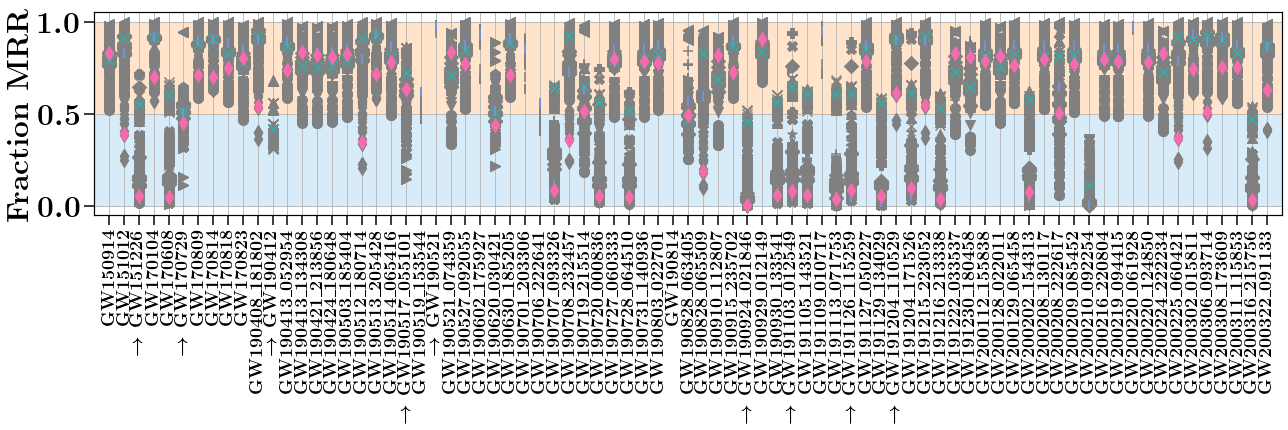

In [5]:
GWlist = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', \
          'GW170809', 'GW170814', 'GW170818', 'GW170823', 'GW190408_181802', 'GW190412']
GWlabels_ = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', \
          'GW170809', 'GW170814', 'GW170818', 'GW170823', r'GW190408$\_$181802', 'GW190412']




GWlist = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', \
                    'GW170814', 'GW170818', 'GW170823', 'GW190408_181802', 'GW190412', 'GW190413_052954',\
                    'GW190413_134308', 'GW190421_213856', 'GW190424_180648', 'GW190503_185404', 'GW190512_180714', \
                    'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521', \
                    'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', \
                    'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190719_215514',\
                    'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701',\
                    'GW190814', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', \
                    'GW190924_021846', 'GW190929_012149', 'GW190930_133541', 'GW191103_012549', 'GW191105_143521',\
                    'GW191109_010717', 'GW191113_071753', 'GW191126_115259', 'GW191127_050227', 'GW191129_134029', \
                    'GW191204_110529', 'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191222_033537', \
                    'GW191230_180458', 'GW200112_155838', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', \
                    'GW200208_130117', 'GW200208_222617', 'GW200209_085452', 'GW200210_092254', 'GW200216_220804', \
                    'GW200219_094415', 'GW200220_061928', 'GW200220_124850', 'GW200224_222234', 'GW200225_060421',\
                    'GW200302_015811', 'GW200306_093714', 'GW200308_173609', 'GW200311_115853', 'GW200316_215756', 'GW200322_091133']

GWlabels_ = [r'GW150914', r'GW151012', r'GW151226', r'GW170104', r'GW170608', r'GW170729', r'GW170809', \
                    'GW170814', r'GW170818', r'GW170823', r'GW190408$\_$181802', r'GW190412', r'GW190413$\_$052954',\
                    'GW190413$\_$134308', r'GW190421$\_$213856', r'GW190424$\_$180648', r'GW190503$\_$185404', r'GW190512$\_$180714', \
                    'GW190513$\_$205428', r'GW190514$\_$065416', r'GW190517$\_$055101', r'GW190519$\_$153544', r'GW190521', \
                    'GW190521$\_$074359', r'GW190527$\_$092055', r'GW190602$\_$175927', r'GW190620$\_$030421', r'GW190630$\_$185205', \
                    'GW190701$\_$203306', r'GW190706$\_$222641', r'GW190707$\_$093326', r'GW190708$\_$232457', r'GW190719$\_$215514',\
                    'GW190720$\_$000836', r'GW190727$\_$060333', r'GW190728$\_$064510', r'GW190731$\_$140936', r'GW190803$\_$022701',\
                    'GW190814', r'GW190828$\_$063405', r'GW190828$\_$065509', r'GW190910$\_$112807', r'GW190915$\_$235702', \
                    'GW190924$\_$021846', r'GW190929$\_$012149', r'GW190930$\_$133541', r'GW191103$\_$012549', r'GW191105$\_$143521',\
                    'GW191109$\_$010717', r'GW191113$\_$071753', r'GW191126$\_$115259', r'GW191127$\_$050227', r'GW191129$\_$134029', \
                    'GW191204$\_$110529', r'GW191204$\_$171526', r'GW191215$\_$223052', r'GW191216$\_$213338', r'GW191222$\_$033537', \
                    'GW191230$\_$180458', r'GW200112$\_$155838', r'GW200128$\_$022011', r'GW200129$\_$065458', r'GW200202$\_$154313', \
                    'GW200208$\_$130117', r'GW200208$\_$222617', r'GW200209$\_$085452', r'GW200210$\_$092254', r'GW200216$\_$220804', \
                    'GW200219$\_$094415', r'GW200220$\_$061928', r'GW200220$\_$124850', r'GW200224$\_$222234', r'GW200225$\_$060421',\
                    'GW200302$\_$015811', r'GW200306$\_$093714', r'GW200308$\_$173609', r'GW200311$\_$115853', r'GW200316$\_$215756', r'GW200322$\_$091133']


print(len(GWlabels_))





GWfull = ['GW200112$\_$155838']

GWhighlight =  [r'GW151226',  r'GW191103$\_$012549', r'GW191126$\_$115259', r'GW170729', r'GW190517$\_$055101',  r'GW190412', 'GW191204$\_$110529', 'GW190924$\_$021846', 'GW190521']


GWlabels = []
for GWl in GWlabels_:  
    if GWl in GWhighlight:
        GWlabels.append(r'$\rightarrow \,$  \textbf{%s}'%GWl)  
    else:
        GWlabels.append(r'\textbf{%s}'%GWl)

# [r'GW151226', r'GW170729']

fs_GW = 30


fig, axe = plt.subplots(1,1, figsize=(18,6))

spin_threshold=0.05
    
ylims =[-1,79]
axe = plotMRR_nonMRR_GW_events(axe=axe, whichRate='observed', ylims=ylims, spin_threshold=spin_threshold, GWnames=GWlist,GWlabels=GWlabels)
# axe = plotMRR_nonMRR_GW_events(axe=axe, whichRate='observed', ylims=ylims, spin_threshold=spin_threshold, GWnames=GWlist,GWlabels=GWlabels)



plt.tight_layout()
plt.savefig('./Rate_allGWs_MRR.png', dpi=600, transparent=False)
plt.savefig('./Rate_allGWs_MRR.pdf', transparent=False) 

plt.show()
plt.close()







In [ ]:
GWlist = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', \
          'GW170809', 'GW170814', 'GW170818', 'GW170823', 'GW190408_181802', 'GW190412']
GWlabels_ = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', \
          'GW170809', 'GW170814', 'GW170818', 'GW170823', r'GW190408$\_$181802', 'GW190412']




GWlist = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', \
                    'GW170814', 'GW170818', 'GW170823', 'GW190408_181802', 'GW190412', 'GW190413_052954',\
                    'GW190413_134308', 'GW190421_213856', 'GW190424_180648', 'GW190503_185404', 'GW190512_180714', \
                    'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190519_153544', 'GW190521', \
                    'GW190521_074359', 'GW190527_092055', 'GW190602_175927', 'GW190620_030421', 'GW190630_185205', \
                    'GW190701_203306', 'GW190706_222641', 'GW190707_093326', 'GW190708_232457', 'GW190719_215514',\
                    'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701',\
                    'GW190814', 'GW190828_063405', 'GW190828_065509', 'GW190910_112807', 'GW190915_235702', \
                    'GW190924_021846', 'GW190929_012149', 'GW190930_133541', 'GW191103_012549', 'GW191105_143521',\
                    'GW191109_010717', 'GW191113_071753', 'GW191126_115259', 'GW191127_050227', 'GW191129_134029', \
                    'GW191204_110529', 'GW191204_171526', 'GW191215_223052', 'GW191216_213338', 'GW191222_033537', \
                    'GW191230_180458', 'GW200112_155838', 'GW200128_022011', 'GW200129_065458', 'GW200202_154313', \
                    'GW200208_130117', 'GW200208_222617', 'GW200209_085452', 'GW200210_092254', 'GW200216_220804', \
                    'GW200219_094415', 'GW200220_061928', 'GW200220_124850', 'GW200224_222234', 'GW200225_060421',\
                    'GW200302_015811', 'GW200306_093714', 'GW200308_173609', 'GW200311_115853', 'GW200316_215756', 'GW200322_091133']

GWlabels_ = [r'GW150914', r'GW151012', r'GW151226', r'GW170104', r'GW170608', r'GW170729', r'GW170809', \
                    'GW170814', r'GW170818', r'GW170823', r'GW190408$\_$181802', r'GW190412', r'GW190413$\_$052954',\
                    'GW190413$\_$134308', r'GW190421$\_$213856', r'GW190424$\_$180648', r'GW190503$\_$185404', r'GW190512$\_$180714', \
                    'GW190513$\_$205428', r'GW190514$\_$065416', r'GW190517$\_$055101', r'GW190519$\_$153544', r'GW190521', \
                    'GW190521$\_$074359', r'GW190527$\_$092055', r'GW190602$\_$175927', r'GW190620$\_$030421', r'GW190630$\_$185205', \
                    'GW190701$\_$203306', r'GW190706$\_$222641', r'GW190707$\_$093326', r'GW190708$\_$232457', r'GW190719$\_$215514',\
                    'GW190720$\_$000836', r'GW190727$\_$060333', r'GW190728$\_$064510', r'GW190731$\_$140936', r'GW190803$\_$022701',\
                    'GW190814', r'GW190828$\_$063405', r'GW190828$\_$065509', r'GW190910$\_$112807', r'GW190915$\_$235702', \
                    'GW190924$\_$021846', r'GW190929$\_$012149', r'GW190930$\_$133541', r'GW191103$\_$012549', r'GW191105$\_$143521',\
                    'GW191109$\_$010717', r'GW191113$\_$071753', r'GW191126$\_$115259', r'GW191127$\_$050227', r'GW191129$\_$134029', \
                    'GW191204$\_$110529', r'GW191204$\_$171526', r'GW191215$\_$223052', r'GW191216$\_$213338', r'GW191222$\_$033537', \
                    'GW191230$\_$180458', r'GW200112$\_$155838', r'GW200128$\_$022011', r'GW200129$\_$065458', r'GW200202$\_$154313', \
                    'GW200208$\_$130117', r'GW200208$\_$222617', r'GW200209$\_$085452', r'GW200210$\_$092254', r'GW200216$\_$220804', \
                    'GW200219$\_$094415', r'GW200220$\_$061928', r'GW200220$\_$124850', r'GW200224$\_$222234', r'GW200225$\_$060421',\
                    'GW200302$\_$015811', r'GW200306$\_$093714', r'GW200308$\_$173609', r'GW200311$\_$115853', r'GW200316$\_$215756', r'GW200322$\_$091133']


print(len(GWlabels_))





GWfull = ['GW200112$\_$155838']

GWhighlight =  [r'GW151226',  r'GW191103$\_$012549', r'GW191126$\_$115259', r'GW170729', r'GW190517$\_$055101',  r'GW190412', 'GW191204$\_$110529', 'GW190924$\_$021846', 'GW190521']


GWlabels = []
for GWl in GWlabels_:
    
  
    if GWl in GWhighlight:
        GWlabels.append(r'$\rightarrow \,$  \textbf{%s}'%GWl)  
    else:
        GWlabels.append(r'\textbf{%s}'%GWl)

# [r'GW151226', r'GW170729']

fs_GW = 30


fig, axe = plt.subplots(1,1, figsize=(18,6))

spin_threshold=0.05
    
ylims =[-1,79]
axe = plotMRR_nonMRR_GW_events(axe=axe, whichRate='observed', ylims=ylims, spin_threshold=spin_threshold, GWnames=GWlist,GWlabels=GWlabels)
# axe = plotMRR_nonMRR_GW_events(axe=axe, whichRate='observed', ylims=ylims, spin_threshold=spin_threshold, GWnames=GWlist,GWlabels=GWlabels)



plt.tight_layout()
plt.savefig('./Rate_allGWs_MRR2.png', dpi=600, transparent=False)
plt.savefig('./Rate_allGWs_MRR2.pdf', transparent=False) 

plt.show()
plt.close()







79
GW150914
GW151012
GW151226
GW170104
GW170608
GW170729
GW170809
GW170814
GW170818
GW170823
GW190408_181802
GW190412
GW190413_052954
GW190413_134308
GW190421_213856
GW190424_180648
GW190503_185404
GW190512_180714
GW190513_205428
GW190514_065416
GW190517_055101
GW190519_153544
GW190521
GW190521_074359
GW190527_092055
GW190602_175927
GW190620_030421
GW190630_185205
GW190701_203306
GW190706_222641
GW190707_093326
GW190708_232457
GW190719_215514
GW190720_000836
GW190727_060333
GW190728_064510
GW190731_140936
GW190803_022701
GW190814
GW190828_063405
GW190828_065509
GW190910_112807
GW190915_235702
GW190924_021846
GW190929_012149


# OLD PLOTS 

In [ ]:

def plotMRR_nonMRR_GW_events(axe=None, whichRate='intrinsic', ylims=[0,1], spin_threshold=0.05, GWname='GW150912'):



    channelColorDict = {'LVKM1 spinning':'mediumseagreen', 'LVKM2 spinning':'crimson', 'All one spinning':'darkgray'}
    List_formationchannelOptions = ['All', 'All one spinning', 'LVKM1 spinning',  'LVKM2 spinning']
    ind_formationchannelOptions = [0,1,2,3]
    dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
    
    stringgg =   'MRR_nonMRR_ratio_' + GWname 
    csvPath = '/Users/floorbroekgaarden/Projects/GitHub/MRR_Project/dataFiles/rates_MSSFR_Models_'+'BHBH'+ '_' + stringgg + '.csv'

        
        
        
    df = pd.read_csv(csvPath, index_col=0).T
    
#     for ind_c, whichSpin in enumerate(['LVKM1 spinning',  'LVKM2 spinning']):

    for ind_L, MSSFRname in enumerate(MSSFRnameslist):
        key_mssfr = MSSFRheaderDict[MSSFRname]
        rates_L = df[key_mssfr]
        
        if whichRate =='intrinsic':
            xlabel =  r'model ' 
            text_legend = r'\textbf{a) intrinsic population}'
             
            totalrates = np.asarray(rates_L[0::10][0:nModels])
            
            fraction_MRR = np.asarray(rates_L[2::10][0:nModels]) #
            fraction_nonMRR = (np.asarray(rates_L[4::10][0:nModels])) # / fraction_spin
            fraction_MRR_CIspin = (np.asarray(rates_L[6::10][0:nModels])) #/ fraction_spin
            fraction_nonMRR_CIspin = (np.asarray(rates_L[8::10][0:nModels])) #/ fraction_spin
            
#             print(fraction_MRR)
            
            
            

        elif whichRate=='observed':
            xlabel =  r'model ' 
            text_legend = r'\textbf{b) detectable population}' 
            
            totalrates = np.asarray(rates_L[1::10][0:nModels])
            fraction_MRR = np.asarray(rates_L[3::10][0:nModels]) #
            fraction_nonMRR = (np.asarray(rates_L[5::10][0:nModels])) # / fraction_spin
            fraction_MRR_CIspin = (np.asarray(rates_L[7::10][0:nModels])) #/ fraction_spin
            fraction_nonMRR_CIspin = (np.asarray(rates_L[9::10][0:nModels])) #/ fraction_spin   



        
        for ind_BPS, BPS_name in enumerate(BPSnameslist):

            color_BPS = 'gray'
            zorder=3
#             if BPS_name in ['A','B', 'J', 'K', 'R']:
            color_BPS = [colorDirDict[BPS_name]]
            zorder=10
            
            axe.scatter(ind_BPS, fraction_MRR[ind_BPS]/(fraction_MRR[ind_BPS]+fraction_nonMRR[ind_BPS]),  c=color_BPS,\
                        s=150, label=None, zorder=zorder, alpha=1, marker=markershapes[ind_BPS]) #c=BPScolors
            
            
            axe.scatter(ind_BPS+0.4, fraction_MRR_CIspin[ind_BPS]/(fraction_MRR_CIspin[ind_BPS]+fraction_nonMRR_CIspin[ind_BPS]), c=color_BPS,\
                        s=150, label=None, zorder=zorder, alpha=0.7, marker=markershapes[ind_BPS]) #c=BPScolors
        

    
    # plot a line for the 50% 
    yy_half = [0.5, 0.5]
    xx_half = [0,100]
#     axe.plot(xx_half, yy_half, lw=4, linestyle=':', zorder=3, color='deepskyblue')
    
    
    
#     if whichRate=='observed':
#         # add the 90% credible interval from Galaudage (lambda_0 from https://iopscience.iop.org/article/10.3847/2041-8213/ac2f3c)
#         xx_obs = np.linspace(0,1, 2)
#         yy_galaudage21_bottom, yy_galaudage21_top = [0.1, 0.1], [0.31, 0.31]
#         median_galaudage21 = [0.19, 0.19]

#         axe.plot(xx_obs, median_galaudage21, lw=3, color='gray', zorder=2, alpha=0.8)
#         axe.fill_between(xx_obs, yy_galaudage21_bottom, yy_galaudage21_top, color='lightgray', alpha=0.5, zorder=1)
# #         axe.text(s=r'$90\%$ \textbf{credible interval Galaudage et al. (2021)}', x=0.005, y=0.309, fontsize=14, ha='left', va='top', rotation=90)
#         axe.text(s=r'\textbf{Galaudage et al. (2021)}', x=0.007, y=0.31, fontsize=13, ha='left', va='top', rotation=90, color='gray')
    
#     axe.text(s=text_legend, x=0.03, y=0.975, fontsize=24, ha='left', va='top', rotation=0, transform=axe.transAxes)

#     for ll in [0.1, 0.2, 0.3, 0.4, 0.5]:
#         axe.plot(xx, ll*np.ones_like(xx), c='lightgray', linestyle='dashdot', lw=1, zorder=0)
    xmin, xmax = 0,1
    axe.set_xlim(ylims[0], ylims[1])
    axe.set_ylim(xmin, xmax)
    axe.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#     axe.set_yticklabels([r'$0\%$',r'$20\%$',r'$40\%$', r'$60\%$', r'$80\%$', r'$100\%$'], fontsize=20, rotation=0)#, orientation=30)  
    
    ylabel = r'$\textbf{Fraction MRR} \ %s$'%GWname
    axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False, fontsize=20)
    axe.grid(True)

    
#     ax2y = axe.twiny()
#     ax2y.set_xlim(xmin, xmax)
#     ax2y.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
#     ax2y.set_xticklabels([r'$100\%$', r'$80\%$', r'$60\%$',r'$40\%$',r'$20\%$',r'$0\%$'], fontsize=20, rotation=0)#, orientation=30)  
#     xlabel = r'$\textbf{Percentage} \ m_1 \ \textbf{spinning} \ (\chi_{1}>0.05; \ \textbf{MRR})$'
#     layoutAxes(ax2y, nameX=xlabel, nameY=xlabel, setMinor=False, fontsize=20, second=True, labelpad=15)

    


    return axe


def plot_legend_scatterFigure(axe='None'):
    
        


    color_BPS = 'gray'
    zorder=3
    
    xx_=np.linspace(-100, -90, 10)
    
    
    
    for BPS_name in ['A','B', 'J', 'K', 'R', 'X']:
        if BPS_name=='X':
            # we want to plot a gray square for the legend to indicate all other models
            color_BPS='gray'
            lb = r'\textbf{other models}'
            marker='s'
        else:
            color_BPS = [colorDirDict[BPS_name]]
            lb = r'\textbf{model %s: }'%BPS_name + alphabetPhysicalNameDict[BPS_name]
            marker=dictMarkerShape[BPS_name]
            
            
        axe.scatter(xx_, xx_, s=200, color=color_BPS, label=lb, marker=marker)

    axe.set_xlim(0,1)
    axe.set_ylim(0,1)
    axe.set_axis_off() 

        
    axe.legend(fontsize=20)
        
    return axe 
    
    
    
    

In [ ]:



fig, axe = plt.subplots(1,4, figsize=(30,6),\
                               gridspec_kw={"width_ratios":[3, 3, 3,3]})


for ind_GW, GW in enumerate(['GW151226','GW170729', 'GW190517_055101', 'GW190412']):   #,'GW191109_010717'  ,'GW191103_012549', 'GW191126_115259']:

# for GW in ['GW151226']:
    


    spin_threshold=0.05
    
    ylims =[-1,20]
    axe[ind_GW] = plotMRR_nonMRR_GW_events(axe=axe[ind_GW], whichRate='observed', ylims=ylims, spin_threshold=spin_threshold, GWname=GW) #, CSVdir=CSVdir))


# ylims =[0,.35]
#     axe[1] = plotMRR_nonMRR_GW_events(axe=axe[1], whichRate='observed',  ylims=ylims, spin_threshold=spin_threshold, GWname=GW) #, CSVdir=CSVdir)


# axe[2] = plot_legend_scatterFigure(axe=axe[2])


plt.tight_layout()
plt.savefig('./Rate_GWsCI.png', dpi=600, transparent=False)
plt.savefig('./Rate_GWsCI.pdf', transparent=False) 

plt.show()
plt.close()

In [ ]:



fig, axe = plt.subplots(1,1, figsize=(10,6))


# for ind_GW, GW in enumerate(['GW151226','GW170729', 'GW190517_055101', 'GW190412']):   #,'GW191109_010717'  ,'GW191103_012549', 'GW191126_115259']:

for GW in ['GW151226']:
    


    spin_threshold=0.05
    
    ylims =[-1,20]
    axe = plotMRR_nonMRR_GW_events(axe=axe, whichRate='observed', ylims=ylims, spin_threshold=spin_threshold, GWname=GW) #, CSVdir=CSVdir))


# ylims =[0,.35]
#     axe[1] = plotMRR_nonMRR_GW_events(axe=axe[1], whichRate='observed',  ylims=ylims, spin_threshold=spin_threshold, GWname=GW) #, CSVdir=CSVdir)


# axe[2] = plot_legend_scatterFigure(axe=axe[2])


plt.tight_layout()
plt.savefig('./Rate_GWsCI_'+ GW+'.png', dpi=600, transparent=False)
plt.savefig('./Rate_GWsCI_'+ GW+'.pdf', transparent=False) 

plt.show()
plt.close()